## Volleyball League - Exploratory Data Analysis using Python!
by Atanu Das

In [113]:
#let us import the necessary modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#Import dataset
df=pd.read_csv('VNL2023.csv')

In [115]:
#Let us see some sample data
df.head(5)


,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


#### Okay so this data is about all the player statistics.

In [116]:
#Let us first do some Data inspection and cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [117]:
#let us find the nulll values, if exists.
df.isnull().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [118]:
#let us check for duplicates.
df.duplicated().sum()

0

#### No Null or duplicate values, means the data is almost clean.

In [119]:
#Lets us see the data description
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


### Lets us find the Correleation Matrix here:

In [120]:
numeric_cols = df.select_dtypes(include=['int','float']).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

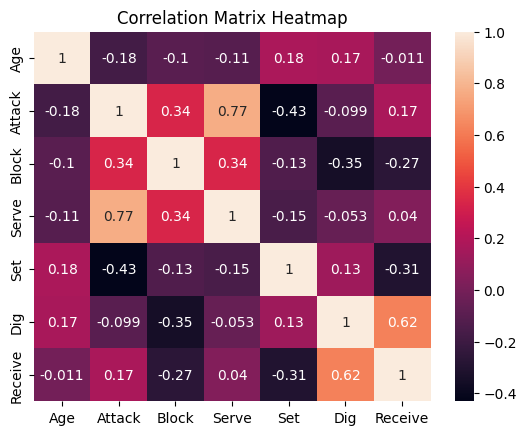

In [121]:
#Since reading the matrix is little harder, we create a correlation heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')


#### *From the heatmap, we conclude that {Serve:Attack, Dig:Receive} has most positive correlation and {Set:Attack , Set:Receive} has most negative correlation.*

In [122]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

<Axes: title={'center': 'Composition of Player in Diff Position'}>

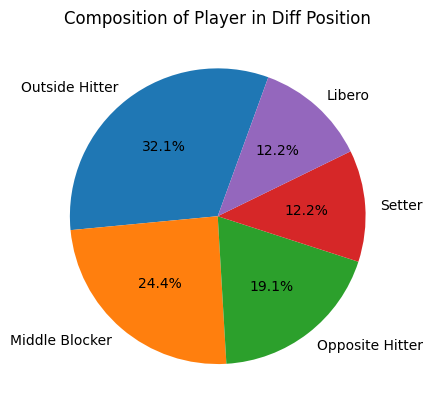

In [123]:
#Let now make a pie chart of position composition
position_map = {
    'MB': 'Middle Blocker',
    'OH': 'Outside Hitter',
    'L': 'Libero',
    'S': 'Setter',
    'OP': 'Opposite Hitter'
}
df['Position'].map(position_map).value_counts().plot(kind='pie',startangle=70, autopct='%1.1f%%', title='Composition of Player in Diff Position', ylabel='' )


### Outside Hitter and Middle Blocker have the highest compositions.

<Axes: title={'center': 'Average Attack by Country'}, xlabel='Country', ylabel='Country'>

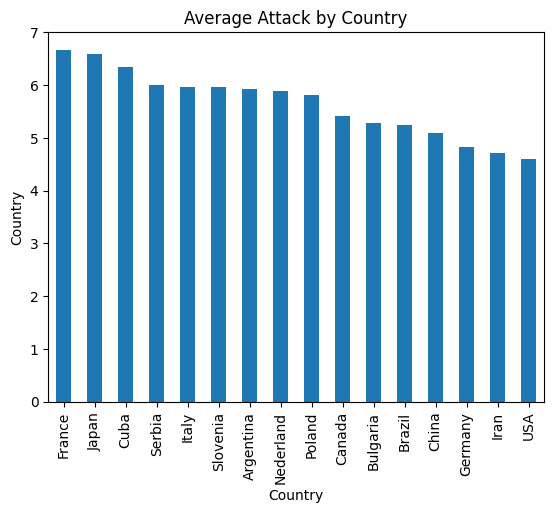

In [124]:
#Lets find Avg. Attack of each country
df.groupby(['Country'])['Attack'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                          title='Average Attack by Country', ylabel='Country')

### France has highest Attack rate, and USA has lowest Attack rate.

<Axes: title={'center': 'Serve rate by Age'}, xlabel='Age', ylabel='Serve'>

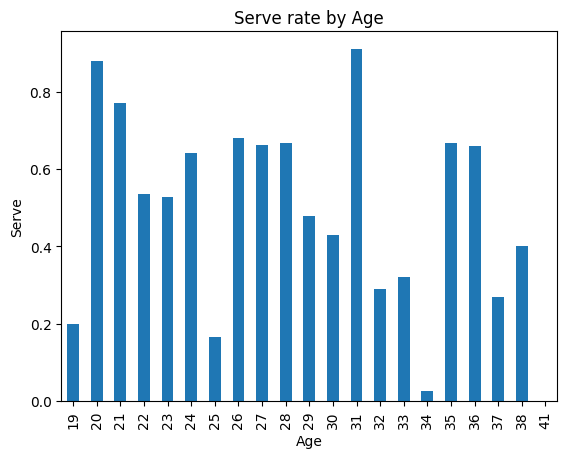

In [125]:
#Lets find Serve rate by Age
df.groupby(['Age'])['Serve'].mean().plot(kind='bar', ylabel='Serve', title='Serve rate by Age' )

### Age 31 has highest Serve rate, also Age 41 has null serve rate.

In [126]:
# Lets find max Attack rate of Country and position.(Top 20)
df.groupby(['Country','Position'])['Attack'].max().reset_index().sort_values(by='Attack', ascending=False).head(20)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


Text(0.5, 1.0, 'Relationship between Block and Receive')

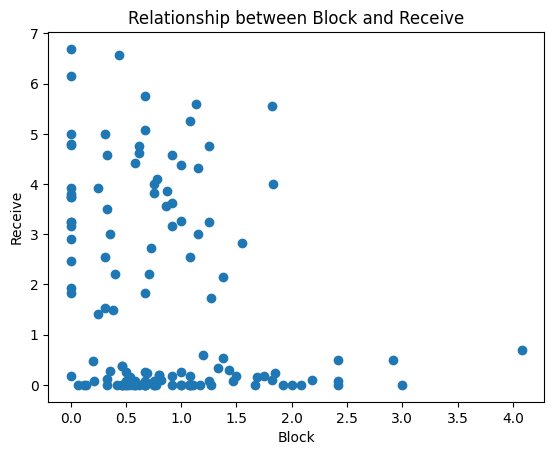

In [127]:
#Lets create a Scatter Plot of Block vs Receive
plt.scatter(df['Block'], df['Receive'])
plt.xlabel('Block')
plt.ylabel('Receive')
plt.title('Relationship between Block and Receive')

Text(0.5, 1.0, 'Box Plot Distribution of Serve Values')

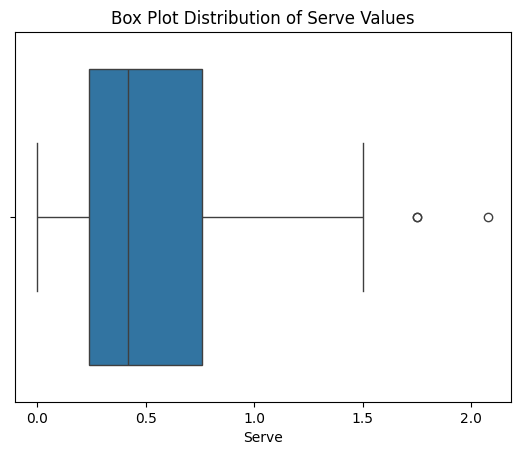

In [128]:
#Lets create a Boxplot of Serve Values
sns.boxplot(x='Serve', data=df)
plt.title('Box Plot Distribution of Serve Values')

Text(0.5, 1.0, 'Distribution of Age')

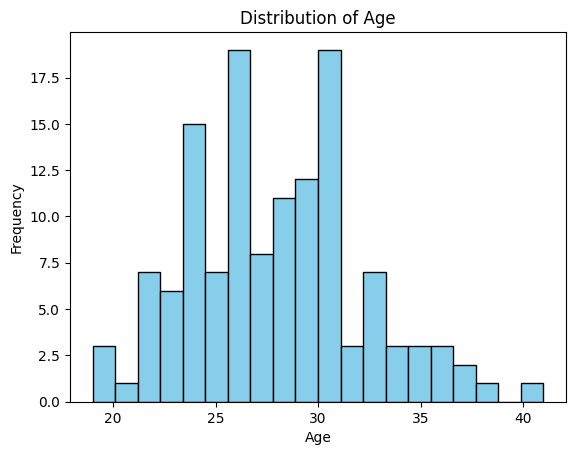

In [129]:
#Lets create a Histogram of Age Frequency
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

### Age 26 and 31 hash highest frequency and Age 39 has null

<Axes: title={'center': 'Average Attack by Position'}, xlabel='Position', ylabel='Attack'>

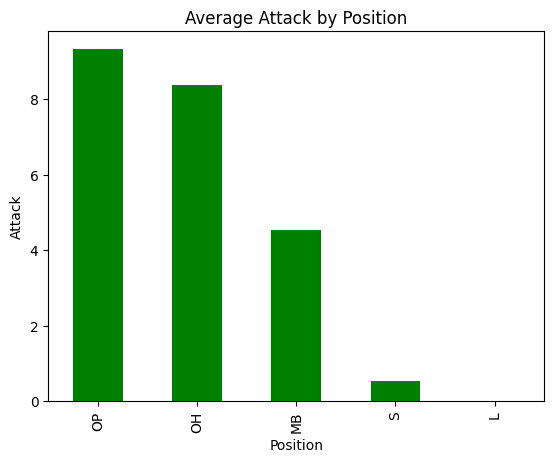

In [136]:
#Lets now find Average Attack by Position
df.groupby(['Position'])['Attack'].mean().sort_values(ascending=False).plot(kind='bar', color='green', ylabel='Attack', title='Average Attack by Position')

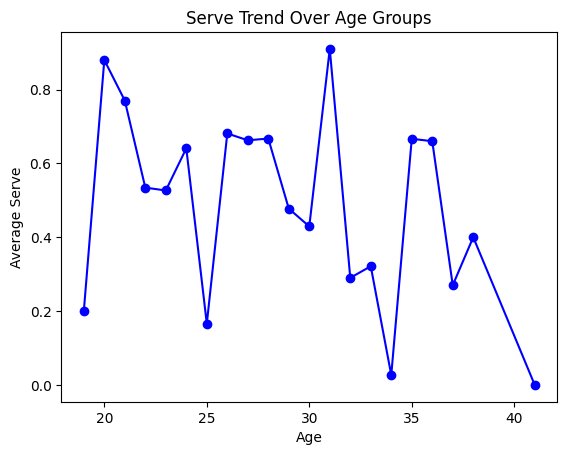

In [140]:
#Lets now find Serve Trend over Age Groups.
age_serve= df.groupby(['Age'])['Serve'].mean().plot(kind='line', marker='o', ylabel='Average Serve', title='Serve Trend Over Age Groups', color='blue')


<Axes: title={'center': 'Total Attack and Block by Country'}, xlabel='Country', ylabel='Total Value'>

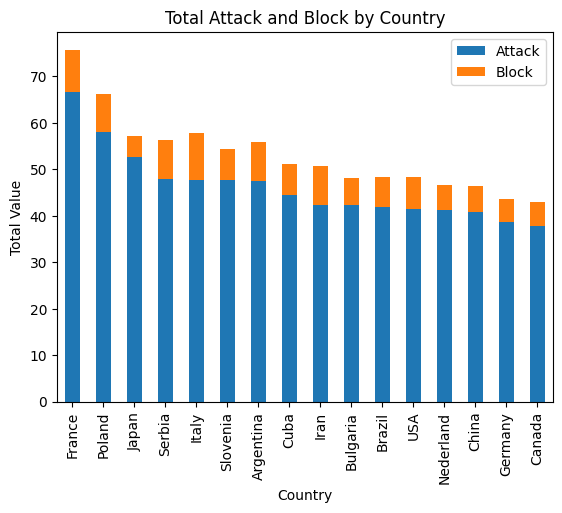

In [148]:
#Lets create a Stacked Bar Chart using Total Attack and Block by Country
tot_attack_country= df.groupby(['Country'])[['Attack','Block']].agg({
                                             'Attack':'sum', 'Block':'sum'}).sort_values(ascending=False, by='Attack')
tot_attack_country.plot(kind='bar',stacked=True, ylabel='Total Value', title='Total Attack and Block by Country')